## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


Mean =  5.027152443622421
Variance = 9.028667318774586


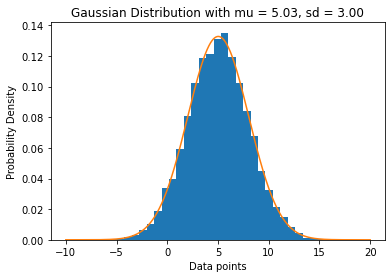

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize




#Loading in clean data
data = np.load('clean_data.npy')

#flatten
data = data[0]


#Fitting a normal distribution
mu,sd = stats.norm.fit(data)

var = sd**2

#Printing mean and variance
print("Mean = ", mu)
print("Variance =", var)



#Setting the range
x= np.linspace(-10,20,1000)


#Pdf
pdf = stats.norm.pdf(x, loc = mu, scale = sd)



#Plotting the histogram
plt.hist(data, bins = 30, density = True)
plt.plot (x,pdf)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
title = "Gaussian Distribution with mu = %.2f, sd = %.2f" % (mu,sd)
plt.title(title)
plt.show()


1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

Mean =  6.614508398212064
Variance = 33.61185712302579


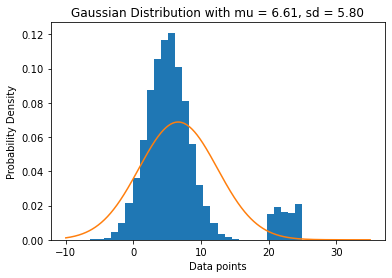

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize




#Loading in corrupted data
data = np.load('corrupted_data.npy')

#flatten
data = data.flatten()




#Fitting a normal distribution
mu,sd = stats.norm.fit(data)




var = sd**2

#Printing mean and variance
print("Mean = ", mu)
print("Variance =", var)



#Setting the range
x= np.linspace(-10,35,1000)


#Pdf
pdf = stats.norm.pdf(x, loc = mu, scale = sd)




#Plotting the histogram
plt.hist(data, bins = 30, density = True)
plt.plot (x,pdf)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
title = "Gaussian Distribution with mu = %.2f, sd = %.2f" % (mu,sd)
plt.title(title)
plt.show()


1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

Original mean =  6.614508398212064
Robust mean =  5.19913884945735
Original variance =  33.61185712302579
Robust variance =  7.008498048801613


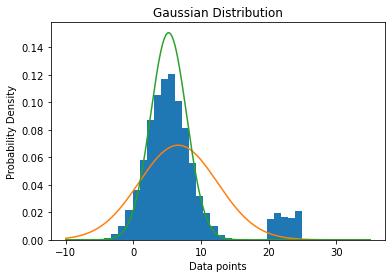

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize




#Loading in corrupted data
data = np.load('corrupted_data.npy')

#flatten
data = data.flatten()



#Fitting a normal distribution
mu,sd = stats.norm.fit(data)




#T distribution
df_tdist, mu_tdist, sd_tdist = stats.t.fit(data)




#Printing original and robust mean and variance
var = sd**2
var_tdist = sd_tdist**2
print("Original mean = ", mu)
print("Robust mean = ", mu_tdist)
print("Original variance = ", var)
print("Robust variance = ", var_tdist)


#Setting the range
x= np.linspace(-10,35,1000)



#Pdf
pdf = stats.norm.pdf(x, loc = mu, scale = sd)
pdf_tdist = stats.norm.pdf(x, loc= mu_tdist, scale = sd_tdist)




#Plotting the histogram
plt.hist(data, bins = 30, density = True)
plt.plot (x,pdf, label = 'Gaussian PDF')
plt.plot (x,pdf_tdist, label = 'Robust PDF')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
title = "Gaussian Distribution"
plt.title(title)
plt.show()

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size $(N\times3)$ that has been reshaped into a vector of size $(N*3 \times 1)$. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the singular values associated with each of the eigenvectors.

**(5 marks)**

In [4]:
import numpy as np
from sklearn.decomposition import PCA


#Loading in array
shape_arr = np.load('shape_array.npy')

#Fitting using PCA
pca = PCA()
pca.fit(shape_arr)




#Calculation
eigenvector = pca.components_
coords = pca.transform(shape_arr)

singular_vals = pca.singular_values_
explained_var = pca.explained_variance_



#Printing

print("Eigenvectors = ", eigenvector)
print("\n\n")
print("Coordinates = ", coords)
print("\n\n")
print("Explained variance = ", explained_var)










Eigenvectors =  [[-0.38037267 -0.37523082 -0.3771994  -0.37817144 -0.37574723 -0.38059318
  -0.37840295]
 [-0.10408948  0.5782456   0.4263102   0.04255039 -0.58818215  0.0017551
  -0.35395613]
 [ 0.16878521  0.5200733  -0.31816155 -0.70664823  0.2516867   0.17260854
  -0.08553915]
 [-0.19174114  0.06954163 -0.27824906  0.418191    0.34790412  0.32721755
  -0.6913643 ]
 [ 0.19346589  0.24013217 -0.7006816   0.3621051  -0.44749284  0.06895317
   0.2789775 ]
 [ 0.8508171  -0.29065713  0.05269541 -0.04612323 -0.16009557 -0.01326375
  -0.4011462 ]
 [ 0.13382939  0.32768428 -0.0599938   0.21838723  0.3202998  -0.8446007
  -0.08647622]]



Coordinates =  [[-5.1101968e-03  3.4575764e-04  6.8627630e-04 ...  1.9255263e-03
  -5.7586579e-04 -9.8192168e-06]
 [ 2.0230772e-02  4.7289776e-03 -2.5007625e-03 ... -9.3817821e-04
  -7.2443872e-06  3.2279352e-04]
 [ 2.4545169e-03  2.9521293e-03  2.5158867e-03 ... -5.7056290e-04
  -1.4625424e-04 -2.5354241e-04]
 ...
 [-1.8145300e-03 -3.1158384e-03 -8.2990766

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the singular values estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [5]:
#Finding covariance matrix

cov = np.cov(shape_arr, rowvar = False)
cov_eigenvalues, cov_eigenvector = np.linalg.eig(cov)

print("Explained variance = ", explained_var)
print("\n\n")
print("Covariance Matrix Eigenvalues = ", cov_eigenvalues)
print("\n\n")


#Finding difference betweem eigenvalues and explained variance
diff = np.abs(cov_eigenvalues - explained_var)
print("The difference is = ", diff)
print("\n\n")
coords2 = np.dot(shape_arr, cov_eigenvector)
print("New coords = ", coords2)
print("\n\n")





Explained variance =  [3.7303747e-04 3.7086209e-06 1.2467503e-06 4.6817763e-07 3.7122518e-07
 9.8105474e-08 3.2671675e-08]



Covariance Matrix Eigenvalues =  [3.73037469e-04 3.70862164e-06 1.24675147e-06 3.26716550e-08
 9.81054237e-08 4.68177310e-07 3.71225469e-07]



The difference is =  [4.93166640e-12 7.86423875e-13 1.12683364e-12 4.35505977e-07
 2.73119760e-07 3.70071836e-07 3.38553794e-07]



New coords =  [[ 5.12260810e-03  3.48037802e-04 -6.85214800e-04 ...  5.74537025e-04
  -2.57142980e-04 -1.92618563e-03]
 [-2.02183523e-02  4.73126701e-03  2.50182091e-03 ...  5.91708552e-06
  -1.55442405e-03  9.37519766e-04]
 [-2.44210297e-03  2.95441286e-03 -2.51482608e-03 ...  1.44925542e-04
  -3.53158909e-04  5.69902894e-04]
 ...
 [ 1.82694185e-03 -3.11355718e-03  8.30967763e-04 ...  6.45629352e-04
   8.31503821e-05  1.39885601e-03]
 [-6.48938367e-03  3.05545888e-03 -5.93285990e-04 ...  6.60832989e-04
   1.33737907e-03  4.87939374e-04]
 [-5.91373235e-02 -2.99627978e-03 -1.44208492e-03 ... 

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

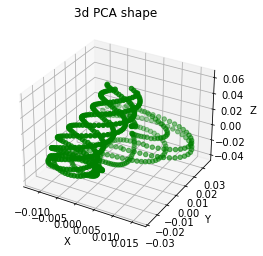

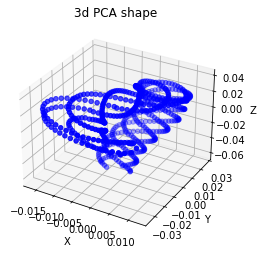

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shape_arr = np.load('shape_array.npy')



#Fitting using PCA
pca = PCA()
pca.fit(shape_arr)




#Calculation
eigenvector = pca.components_
coords = pca.transform(shape_arr)



#Getting one shape
col1 = coords[:, 0]
n = len(col1)//3
reshape = col1.reshape(n,3)


#Plotting
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter (reshape[:,0],reshape[:,1], reshape[:,2], label = 'PCA', color = 'green')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3d PCA shape')
plt.show()




cov = np.cov(shape_arr, rowvar = False)
cov_eigenvalues, cov_eigenvector = np.linalg.eig(cov)
coords2 = np.dot(shape_arr, cov_eigenvector)



#Getting one shape
col2 = coords2[:, 0]
n2 = len(col2)//3
reshape2 = col2.reshape(n2,3)


#Plotting
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter (reshape2[:,0],reshape2[:,1], reshape2[:,2], label = 'PCA', color = 'blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3d PCA shape')
plt.show()






















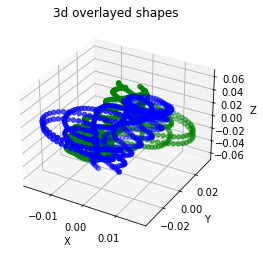

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


ax.scatter (reshape[:,0],reshape[:,1], reshape[:,2], label = 'PCA', color = 'green')

ax.scatter (reshape2[:,0],reshape2[:,1], reshape2[:,2], label = 'PCA', color = 'blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3d overlayed shapes')
plt.show()


# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [8]:
import os
import numpy as np
import pandas as pd

## Define paths to the training data and targets files
#training_data_path = root_dir + 'Training_data.csv'
#training_targets_path = root_dir + 'Training_data_targets.csv'

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

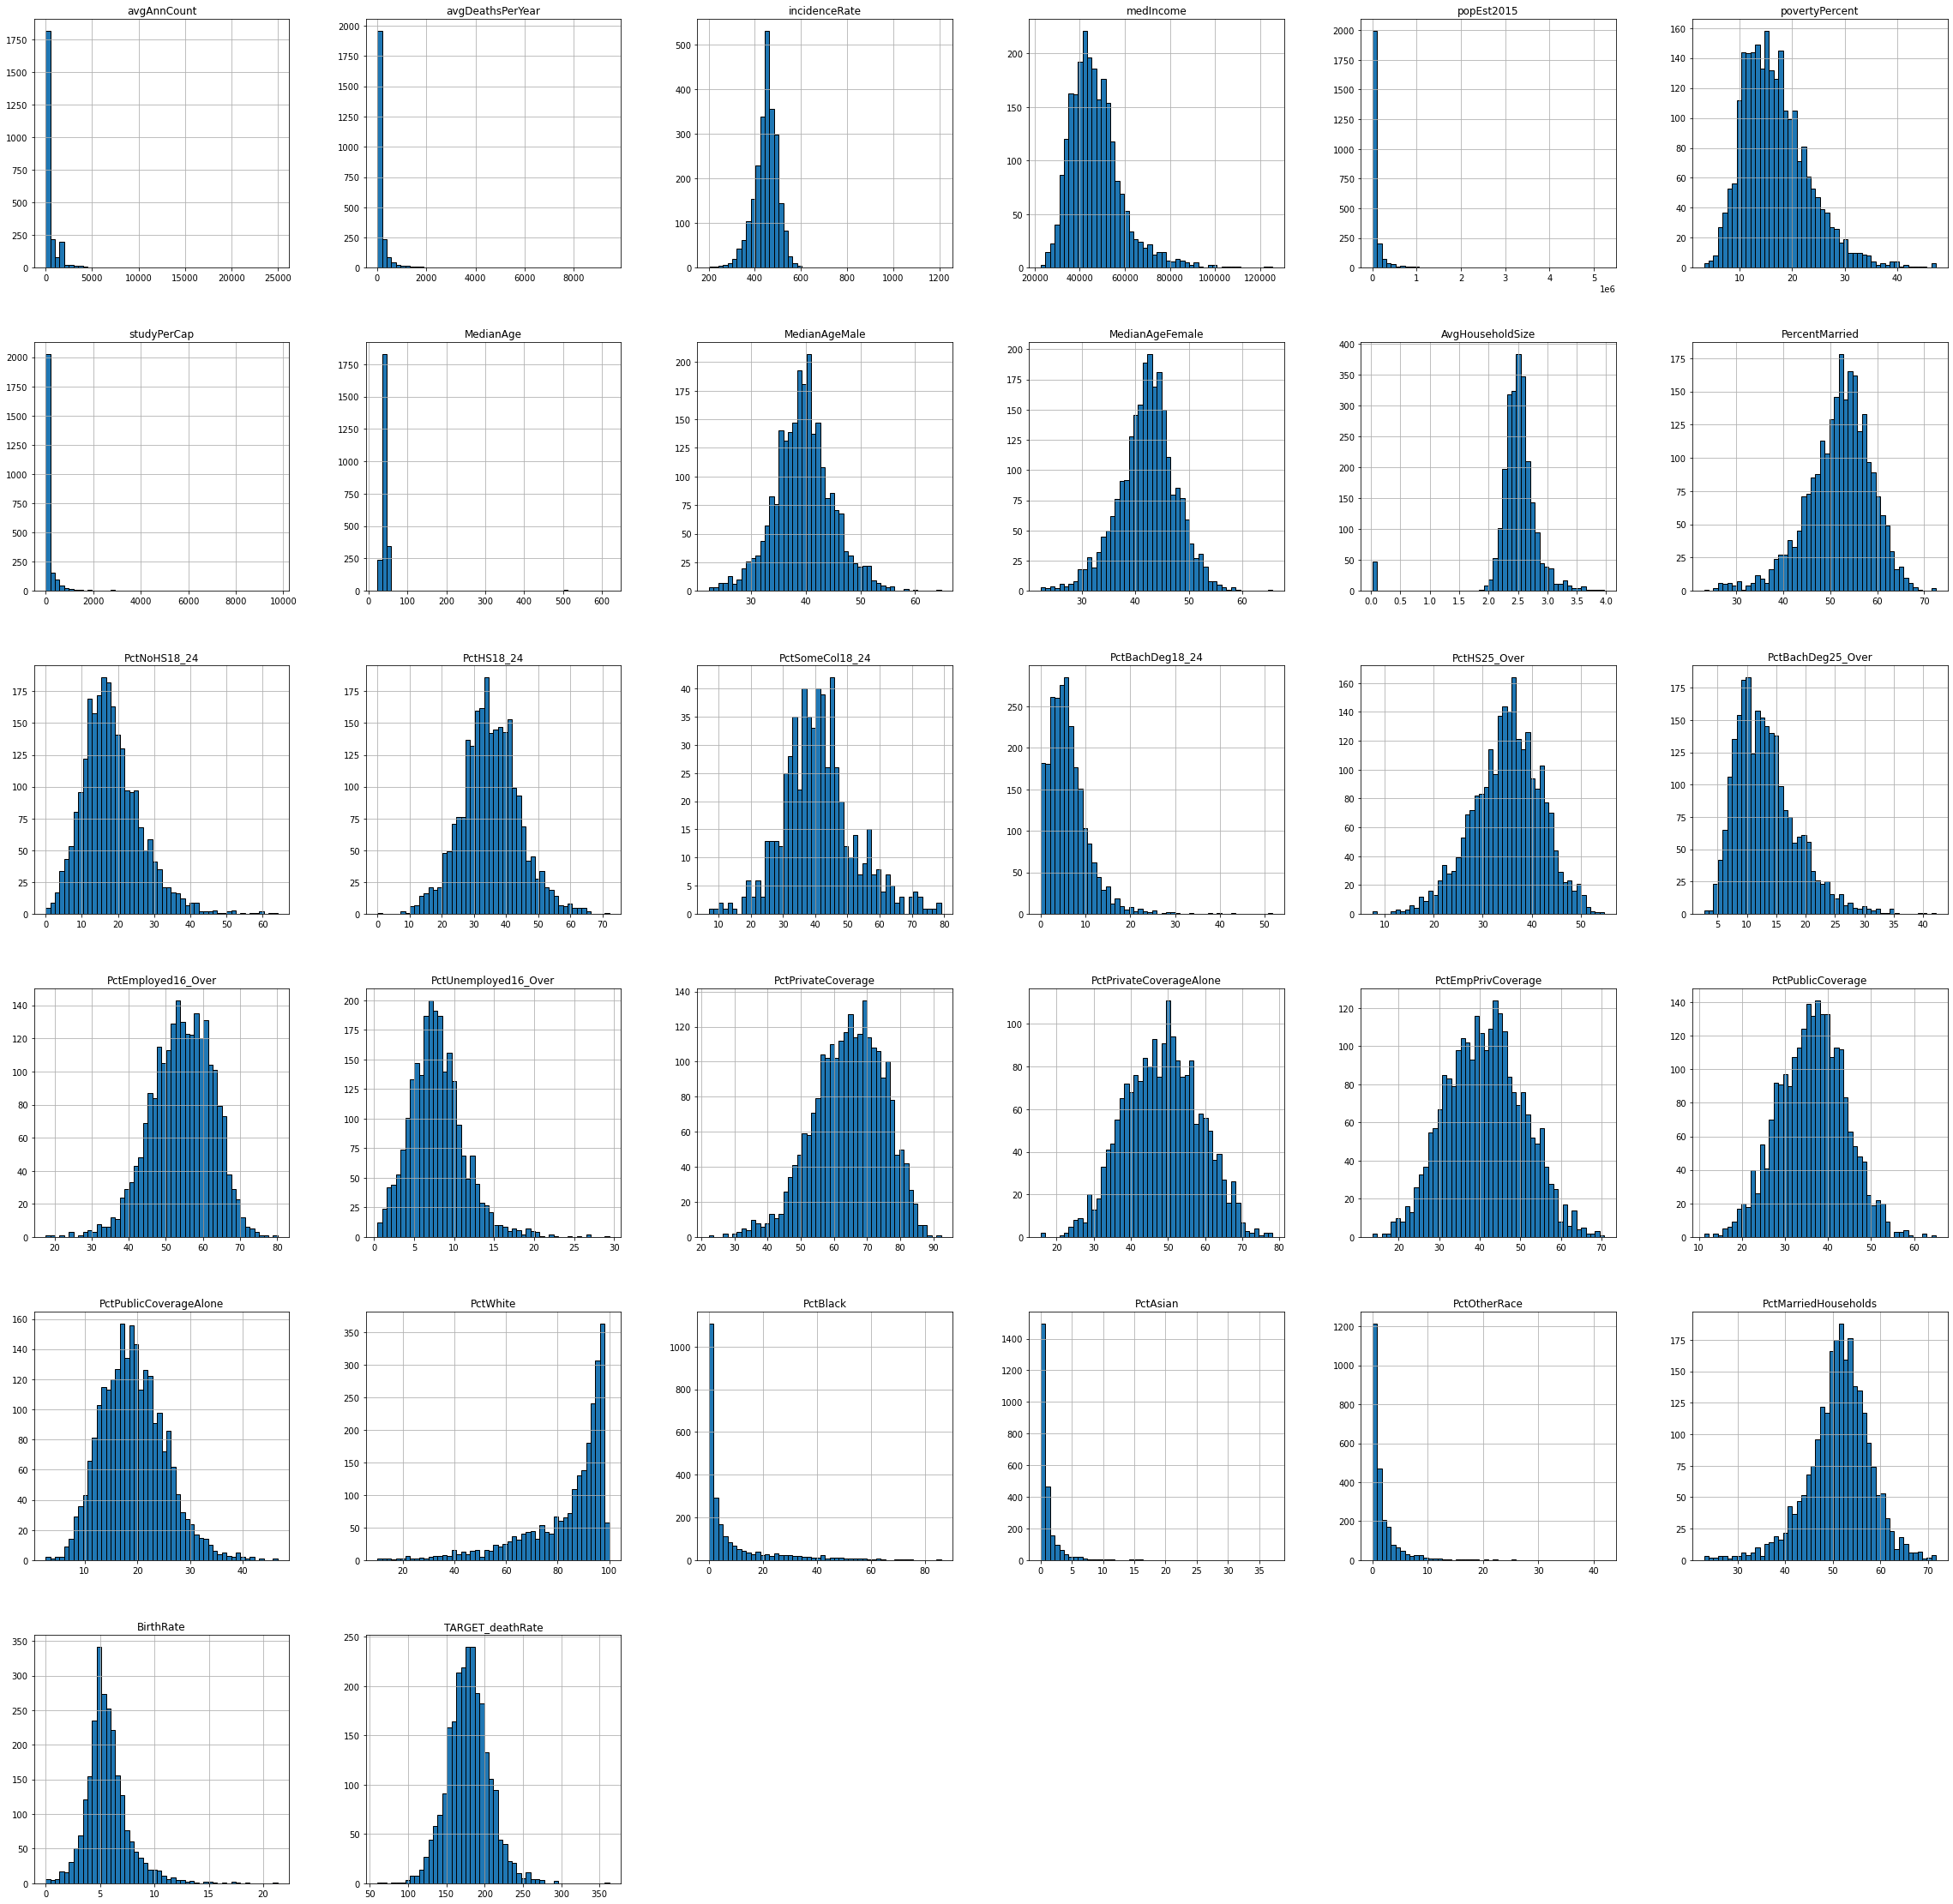

In [9]:
#Reading in the training data and targets files
training_data = pd.read_csv('Training_data.csv')
training_data_targets = pd.read_csv('Training_data_targets.csv')



# Calculating the number of bins we require
bin = int(np.ceil(np.sqrt(training_data.shape[0])))

# Plotting the histograms
training_data_plus_targets = pd.concat([training_data, training_data_targets], axis=1)
training_data_plus_targets.hist(bins=bin, figsize=(40,40), edgecolor = 'black')

plt.xlabel('value')
plt.ylabel('frequency')
plt.show()


___________________________________
ANSWER: 

Unusual values for the features:


- An issue to be looked at is the fact that PctWhite seems to be much higher than PctBlack, PctAsian and PctOtherRace. This either means that the population of people of colour is small, or the data which we have is not very representative in whole. 
- Some metrics also exhibit extremely high values which, while possible, doesn't really improve the accuracy of our model. This is seen in the following metrics: avgAnnCount, studyPerCap, popEst2015 and avgDeathsPerYear. 
- Median age also scales up a lot which is concerning as compared to scales of median ages in males and females (MedianAgeMale, MedianAgeFemale) which are both capped at 60. This was probably due to a calculation error.
- Lastly, AvgHouseholdSize has values less than 0.5 which suggests an error because there should be at least 1 person in a house (error likely due to an unnecessary division by 10. 
__________________________________


*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

In [10]:
#We now compute correlations of all the features 
#with the target variable which is deathRate

correlation1 = training_data.corrwith(training_data_targets['TARGET_deathRate'])

#We sort these correlations in descending order of absolute values (without considering the negative signs)
corr_abs = correlation1.abs().sort_values(ascending = False)
corr_sorted = correlation1[corr_abs.index]

print(corr_sorted)

PctBachDeg25_Over         -0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                 -0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over        -0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage        -0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone   -0.355050
PctMarriedHouseholds      -0.290645
PctBachDeg18_24           -0.284566
PctHS18_24                 0.266285
PercentMarried            -0.266153
PctEmpPrivCoverage        -0.259006
PctBlack                   0.236380
PctSomeCol18_24           -0.186140
PctOtherRace              -0.182602
PctAsian                  -0.181948
PctWhite                  -0.174521
avgAnnCount               -0.150019
popEst2015                -0.130122
avgDeathsPerYear          -0.094048
PctNoHS18_24               0.090565
BirthRate                 -0.088543
AvgHouseholdSize          -0.045545
MedianAgeMale             -0

_______________________
Thus, the top 5 correlations are:


PctBachDeg25_Over         -0.491411

incidenceRate              0.443983

PctPublicCoverageAlone     0.439734

medIncome                 -0.416607

povertyPercent             0.413260
______________________________

*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).


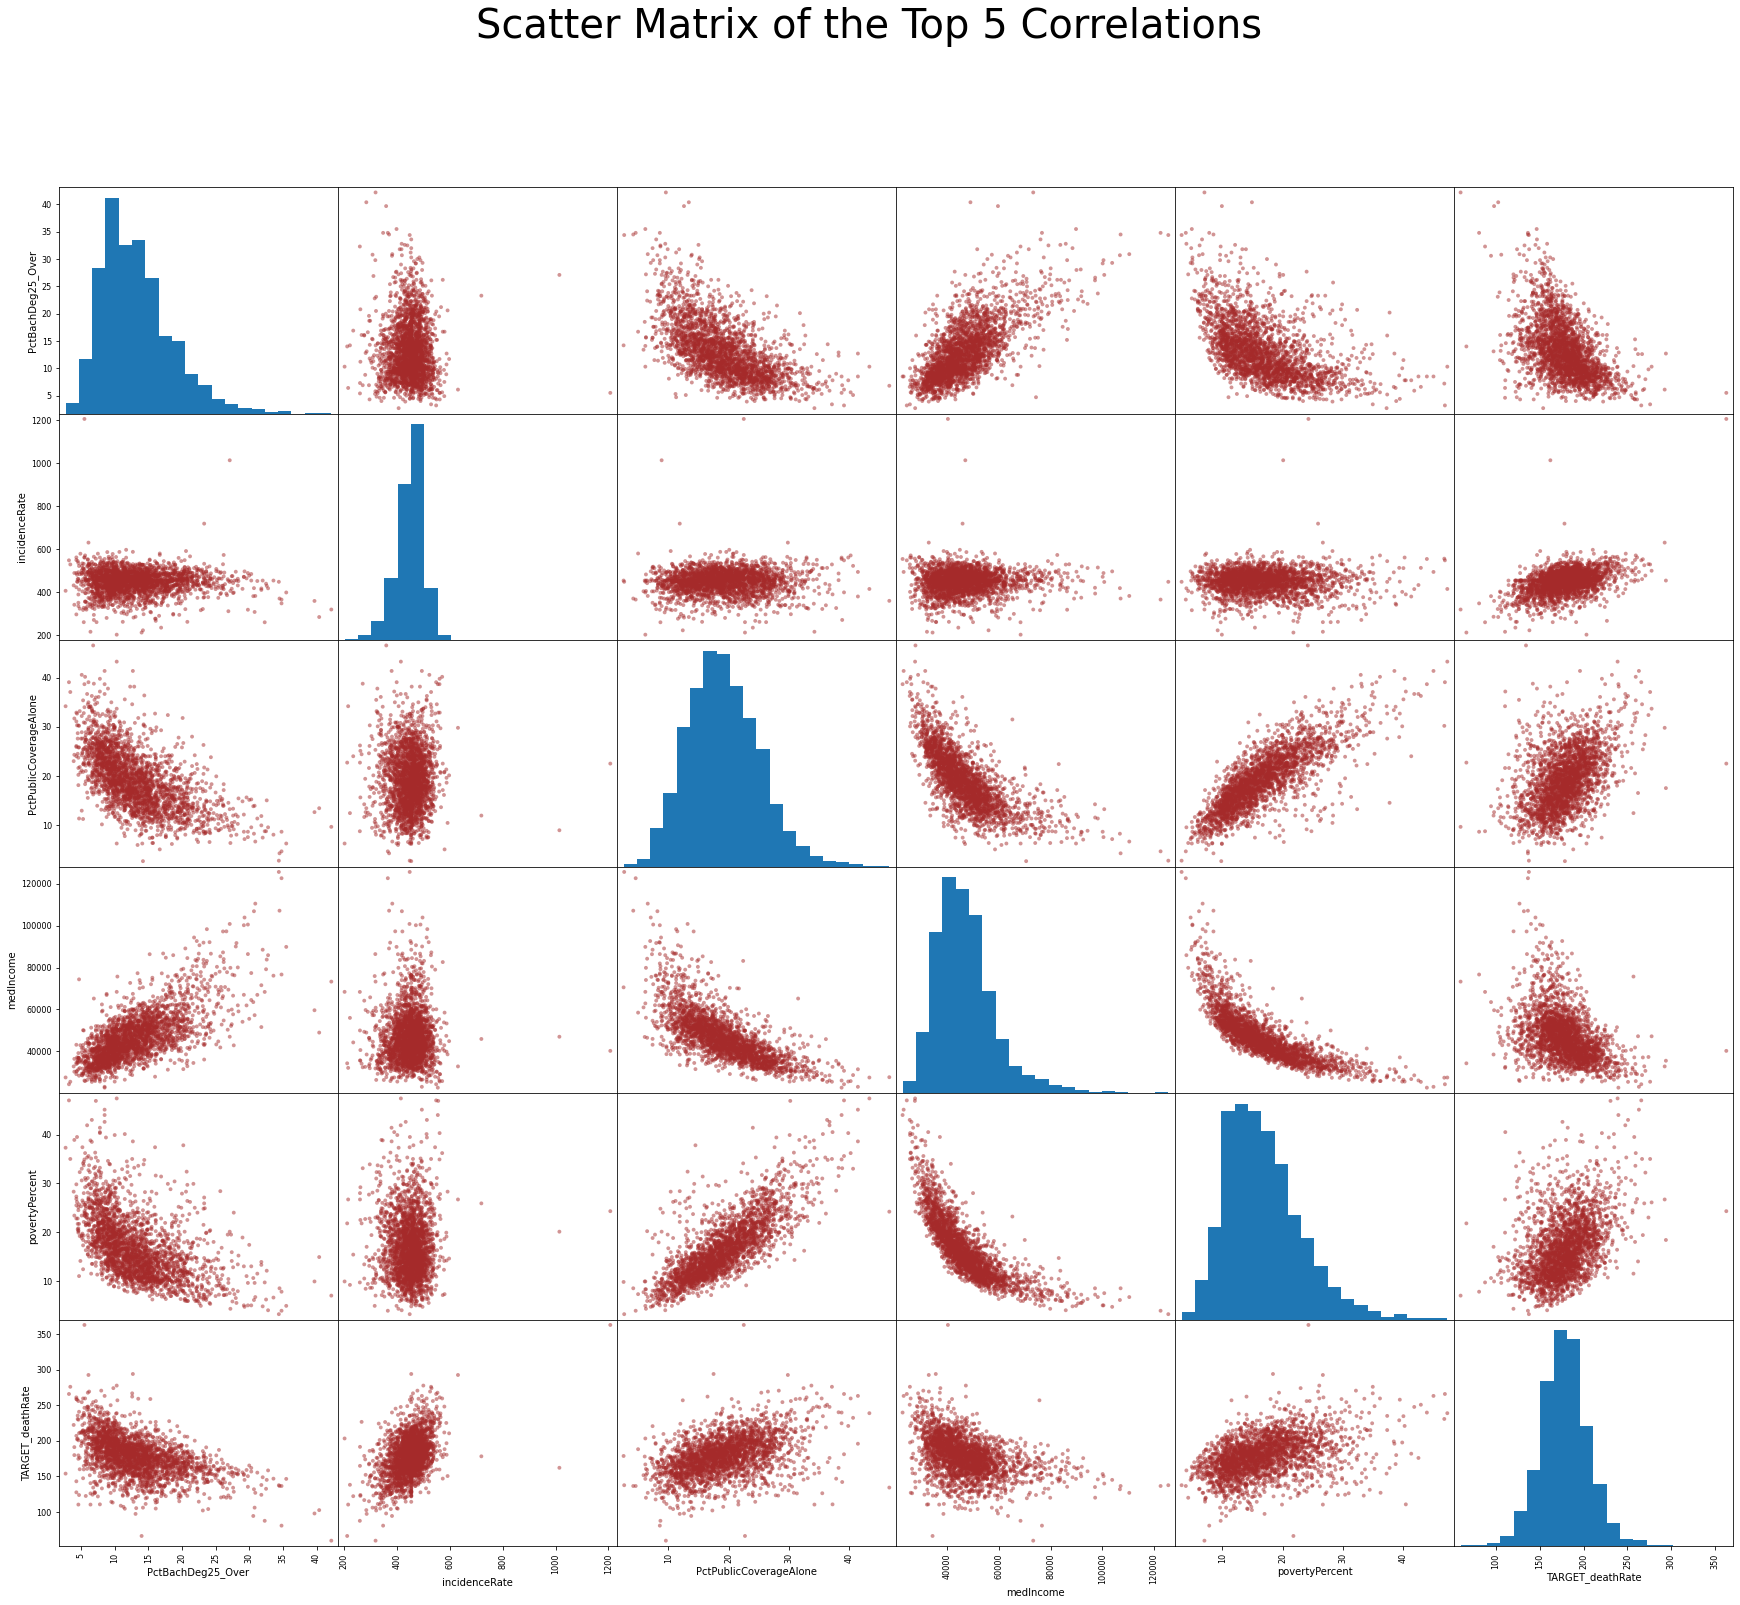

In [11]:
#Plotting the scatter matrix


#We choose the five strongest correlations
corr2 = corr_sorted.index[:5]

#and add on the target feature
scattermatrix_strongestcorr = pd.concat([training_data_plus_targets[corr2], training_data_targets['TARGET_deathRate']], axis=1)

#and finally plot it
pd.plotting.scatter_matrix(scattermatrix_strongestcorr, figsize=(30, 25), hist_kwds={'bins': 20}, s=60, color = 'brown')
plt.suptitle('Scatter Matrix of the Top 5 Correlations', fontsize = 40)
plt.show()

______________________________
Observations from the scatter matrices:


We see a positive correlation between PctBatchDeg25_Over and medIncome, showing that the higher a county's income is, the more people there are attaining a Bachelor's degree. 

We also see a negative correlation between medIncome and PctPublicCoverageAlone as well as between medIncome and povertyPercent. This tells us that lower median incomes result to higher poverty and thus a bigger reliance on government-provided health coverage.
Additionally, a positive correlation between povertyPercent and PctPublicCoverageAlone implies that a higher poverty percentage in a county results in more people relying solely on government-provided health coverage, solidifying the medIncome observations. 

There's no specific correlation of the incidence rate with the other top features, from which we can conclude that the avg cancer diagnoses are not related to wealth, education, health insurance or the income in the counties.

______________________

*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

Pre-processing of training data:

In [12]:
#Checking for missing values first


print("No. of missing values:", training_data.isnull().sum().sum())

print("No. of total values:", round(training_data.sum().sum()))



No. of missing values: 2431
No. of total values: 367245138


There are 2341 missing values which is much smaller than the total number of values.

So we replace with a substitute value or entirely remove the rows that contain them.

In [13]:
#Checking to see which rows the missing values are from
missing_vals = training_data.isnull().sum()[training_data.isnull().sum() > 0]
print(missing_vals)


PctSomeCol18_24            1829
PctEmployed16_Over          119
PctPrivateCoverageAlone     483
dtype: int64


As there isn't a strong correlation between these and the target value, 
we remove these rows entirely.



In [14]:
from sklearn.base import BaseEstimator

missing_vals_cols= ['PctSomeCol18_24', 'PctPrivateCoverageAlone', 'PctPrivateCoverageAlone']


#Transformer class to remove unwanted rows

class RemoveFeature(BaseEstimator):
    
    
    def __init__(self, missing_vals_cols):
        self.col = missing_vals_cols

        
    def fit(self, A, y=None):
        return self
  

    def transform(self, A, y=None):
        x = A.copy(deep=True)
        x.drop(self.col, axis=1, inplace=True)
        return x



#we will call this class later


To get rid of outliers (values that are more than 3 standard deviations from the mean), we create the function below which uses the SD (standard deviation) method.

In [15]:
#Removing outliers using the SD method



class RemoveOutlier(BaseEstimator):
    def __init__(self):
        return None
    
   

    def fit(self, A, y=None):
        return self
    
    def transform(self, A, y=None):
        x = A.copy(deep=True)
        
        
        #We set the maximum age limit as 120
        x.loc[x['MedianAge'] > 120, 'MedianAge'] = x['MedianAge'] * 0.1
        
       
        #Similarly, we use 1 as the minimum for Household Age
        x.loc[x['AvgHouseholdSize'] < 1, 'AvgHouseholdSize'] = x['AvgHouseholdSize'] * 10
        
        
        
        
        
        for col in x.columns:
            
            #calculating mean and standard deviation
            mu = x[col].mean()
            std = x[col].std()
            
            # Replacing existing outliers with the median using the SD method
            x.loc[(x[col]> mu + 3*std)|(x[col]< mu - 3*std), col] = x[col].median()
        
        return x

We add new features into data set to allow us to remove overinflated values.

In [16]:
#Transformer
class AddFeature(BaseEstimator):
    def __init__(self):
        return None
    

    def fit(self, X, y=None):
        return self
    
    def transform(self, A, y=None):
        x = A.copy(deep=True)
        
        
        
        #Total cases per county
        x['countyEstNumberAffected'] = x['avgAnnCount'] / x['popEst2015']
        
       
        #Total deaths per county
        x['countyEstNumberDeaths'] = x['avgDeathsPerYear'] / x['popEst2015']
      
        #Total study per capital per county
        x['countyEstNumberStudy'] = x['studyPerCap'] / x['popEst2015']
        
        
        
        return x


        
missing_vals_cols.extend(['avgAnnCount', 'popEst2015', 'studyPerCap', 'avgDeathsPerYear'])




We create a pipeline using simple imputer and standard scalar (ML Pipeline pt 2)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


#removing headings
fnames = training_data.columns



fnames = fnames.append(pd.Index(['countyEstNumberAffected', 'countyEstNumberDeaths', 'countyEstNumberStudy']))
fnames = fnames.drop(missing_vals_cols)


#adding features, removing ones with missing/overinflated values, removing outliers/impossible values, 
#using simple imputer and standard scalar
training_data_pipeline = Pipeline([('add_features', AddFeature()), ('remove_features', RemoveFeature(missing_vals_cols)), ('remove_outliers', RemoveOutlier()), ('imputer',SimpleImputer(strategy="median")), ('std_scaler',StandardScaler())])

We split the data into training and test sets.
( as in ML Pipeline pt 1)

In [18]:
from sklearn.model_selection import train_test_split



pre_processed_training_data = training_data_pipeline.fit_transform(training_data)


#20% for test size
train_set, test_set, train_targets, test_targets = train_test_split(training_data, training_data_targets, test_size=0.2, random_state=17)

train_set = training_data_pipeline.fit_transform(train_set)
test_set = training_data_pipeline.transform(test_set)

**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

We fit a linear regression model with ordinary least squares (ML-pipeline 3):

OLS to fit a regression model on pre processed training data and predicting with OLS model on test data:

In [19]:
from sklearn.linear_model import LinearRegression


#linear regression model
LRM = LinearRegression()

#we fit the model
LRM.fit(train_set, train_targets)

#predict using LRM model on test data
predict = LRM.predict(test_set)





For quantitative analysis, we use root mean square error, cross validating metrics from test set against those from the training set.

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score




cross_val = np.sqrt(-cross_val_score(LRM, train_set, train_targets, cv=10, scoring="neg_mean_squared_error"))


LRM_test = np.sqrt(mean_squared_error(test_targets, predict))
                             
print("RMSE cross validation score for OLS = ", cross_val.mean())
print("RMSE test score for OLS = ", LRM_test.mean())
print("Difference = ", np.abs(cross_val.mean()-LRM_test.mean()))











RMSE cross validation score for OLS =  14.762832702330318
RMSE test score for OLS =  15.60819181935449
Difference =  0.8453591170241719


We see that the difference is very small, showing that the model has not been overfit or underfit.

We now create a scatter plot to show how the predicted values from ordinary least squares compares with the actual values.

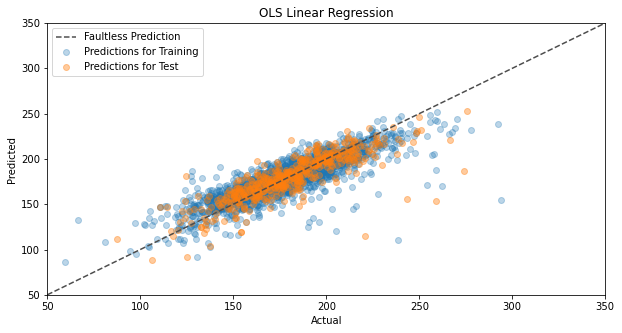

In [21]:
figure = plt.figure(figsize=(10, 5))


#predictions from training set against actual values
plt.scatter(train_targets, LRM.predict(train_set), alpha=0.3, label="Predictions for Training")




#predictions from test set against actual values
plt.scatter(test_targets, predict, alpha=0.4, label = "Predictions for Test")


#y=x line
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3", label="Faultless Prediction")



plt.xlim(50, 350)
plt.ylim(50, 350)
plt.title("OLS Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

___________________________
We see a positive correlation!

There is some deviation at the extremes, but the points are close to the actual values in the central range so we know the model is effective.


____________________________________

Lasso model:



In [22]:
#we use grid search to see which regularisation weight would perform the best

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#we give a range of alpha values
alpha = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 25.0, 30.0, 35.0, 40.0, 50.0]}

#Base Lasso regression model
lasso = Lasso(random_state=17, alpha=0.1, tol=0.01, max_iter=10000, selection='random', warm_start=True)

#carrying out the grid search
grid_search = GridSearchCV(lasso, alpha, scoring='neg_mean_squared_error', cv=10)

#fitting model with training data
grid_search.fit(train_set, train_targets)

#best option
best_lasso = grid_search.best_estimator_

print(f"Best alpha value = {best_lasso.alpha}")


predict = best_lasso.predict(test_set)

Best alpha value = 0.1


__________________________
We see that the best alpha value is 0.1.

Now, we use RMSE to test the Lasso linear regression model:

__________________________


In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error



lasso.fit(train_set, train_targets)

RMSE_cv = np.sqrt(-cross_val_score(lasso, train_set, train_targets, cv=10, scoring="neg_mean_squared_error"))

RMSE_test = np.sqrt(mean_squared_error(train_targets, lasso.predict(train_set)))



print("Mean Cross-Validation RMSE =", RMSE_cv.mean())

print("Mean Test Set RMSE =", RMSE_test.mean())

print("Difference between the two = ", np.abs(RMSE_cv.mean() - RMSE_test.mean()))

Mean Cross-Validation RMSE = 14.72766692614378
Mean Test Set RMSE = 14.533079852743858
Difference between the two =  0.1945870733999211


_____________________

The difference between the cross validation and test scores is once again small, so it's not an overfit.

We also see that the RMSE test score is smaller than the OLS one. This means it's more accurate.





_____________________________

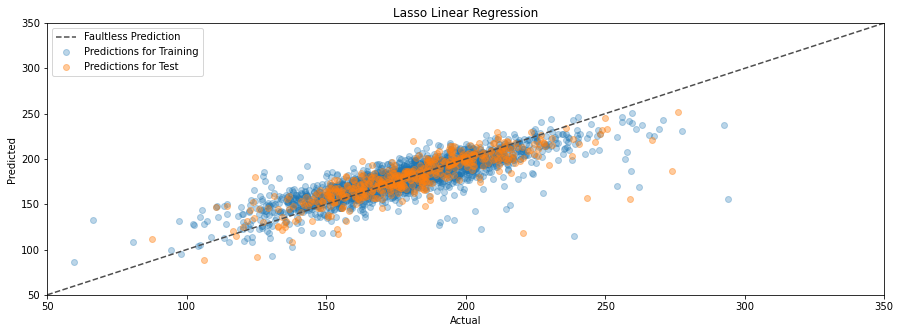

In [24]:
#plotting the regression

figure = plt.figure(figsize=(15, 5))


#predictions from training set against actual values
plt.scatter(train_targets, lasso.predict(train_set), alpha=0.3, label="Predictions for Training")


#predictions from test set against actual values
plt.scatter(test_targets, predict, alpha=0.4, label = "Predictions for Test")


#y=x line
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3", label="Faultless Prediction")


plt.xlim(50, 350)
plt.ylim(50, 350)
plt.title("Lasso Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()




__________________

The Lasso model looks similar to the OLS model, and both are reliable.

Ridge model:
    
    
    
_______________________

In [25]:
#we use grid search to see which regularisation weight would perform the best



from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#we give a range of alpha values
alpha = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 25.0, 30.0, 35.0, 40.0, 50.0]}

#Base Ridge regression model
ridge = Ridge(random_state=17, alpha=0.1, tol=0.01, max_iter=10000)

#carrying out the grid search
grid_search = GridSearchCV(ridge, alpha, scoring='neg_mean_squared_error', cv=10)

#fitting model with training data
grid_search.fit(train_set, train_targets)

#best option
best_ridge = grid_search.best_estimator_

print(f"Best alpha value = {best_ridge.alpha}")



Best alpha value = 10.0


So we use the best alpha value which is 10. 

In [26]:
#we set alpha as 10, fit the model with training data and
#make predictions with the test set


ridge = Ridge(random_state=17, alpha=10.0, tol=0.01, max_iter=10000)

ridge.fit(train_set, train_targets)

predict = best_ridge.predict(test_set)




We calculate RMSE (same as above).

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score




cross_val = np.sqrt(-cross_val_score(ridge, train_set, train_targets, cv=10, scoring="neg_mean_squared_error"))


ridge_test = np.sqrt(mean_squared_error(test_targets, predict))
                             
print("RMSE cross validation score for Ridge = ", cross_val.mean())
print("RMSE test score for Ridge = ", ridge_test.mean())
print("Difference = ", np.abs(cross_val.mean()-ridge_test.mean()))




RMSE cross validation score for Ridge =  14.754392213273771
RMSE test score for Ridge =  15.557373065150086
Difference =  0.8029808518763151


___________________________
Again, with a small difference, we aren't concerned about overfitting.

Comparing the RMSE of test score with the last 2 regression models, we see that while Ridge is better than OLS, it is not as accurate as Lasso.
___________________________

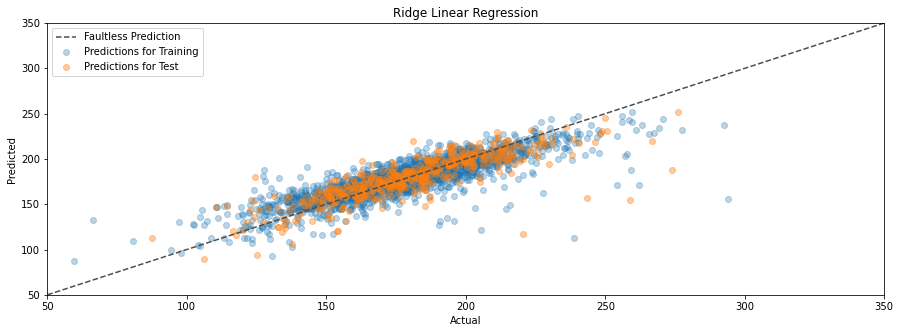

In [28]:
#plotting the regression

figure = plt.figure(figsize=(15, 5))


#predictions from training set against actual values
plt.scatter(train_targets, ridge.predict(train_set), alpha=0.3, label="Predictions for Training")


#predictions from test set against actual values
plt.scatter(test_targets, predict, alpha=0.4, label = "Predictions for Test")


#y=x line
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3", label="Faultless Prediction")


plt.xlim(50, 350)
plt.ylim(50, 350)
plt.title("Ridge Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()




The plotted regression looks similar to the other two.

_______________________________


We have seen that the differences between the cross validation scores and the test scores is the least in the Lasso model.


In conclusion, the Lasso regression model (with a difference of 0.1945870733999211) performed the best.
The Ridge regression model (with a difference of 0.8029808518763151) was the second best, followed by the OLS model (with a difference of 0.8453591170241719).

________________________________